In [10]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium
from folium import plugins
from tqdm.notebook import tqdm as tqdm


from pathlib import Path
data_dir = Path('../data/covid19')

import os
os.listdir(data_dir)

import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(data_dir/'train.csv',parse_dates=['Date'])
data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [12]:
cleaned_data = pd.read_csv('../data/covid19_cleaned_data/covid_19_clean_complete.csv', parse_dates=['Date'])
cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


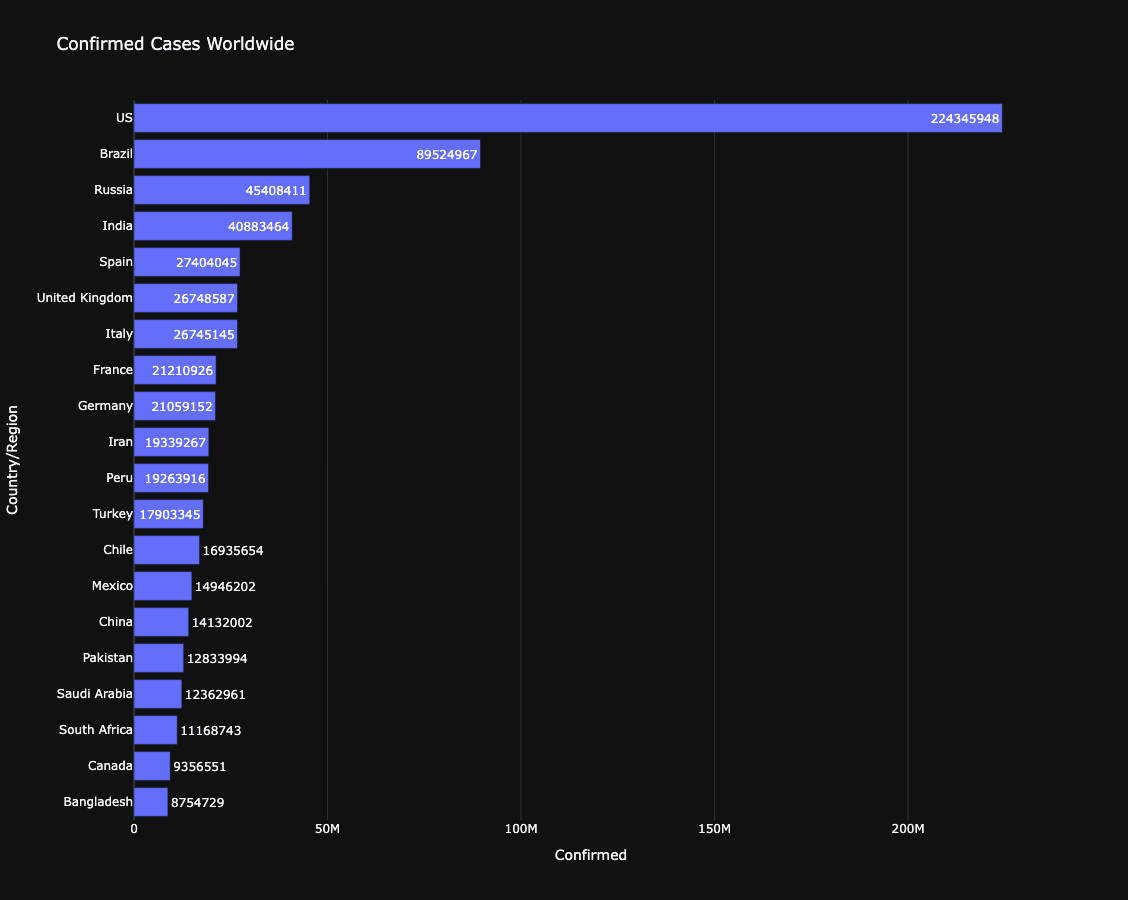

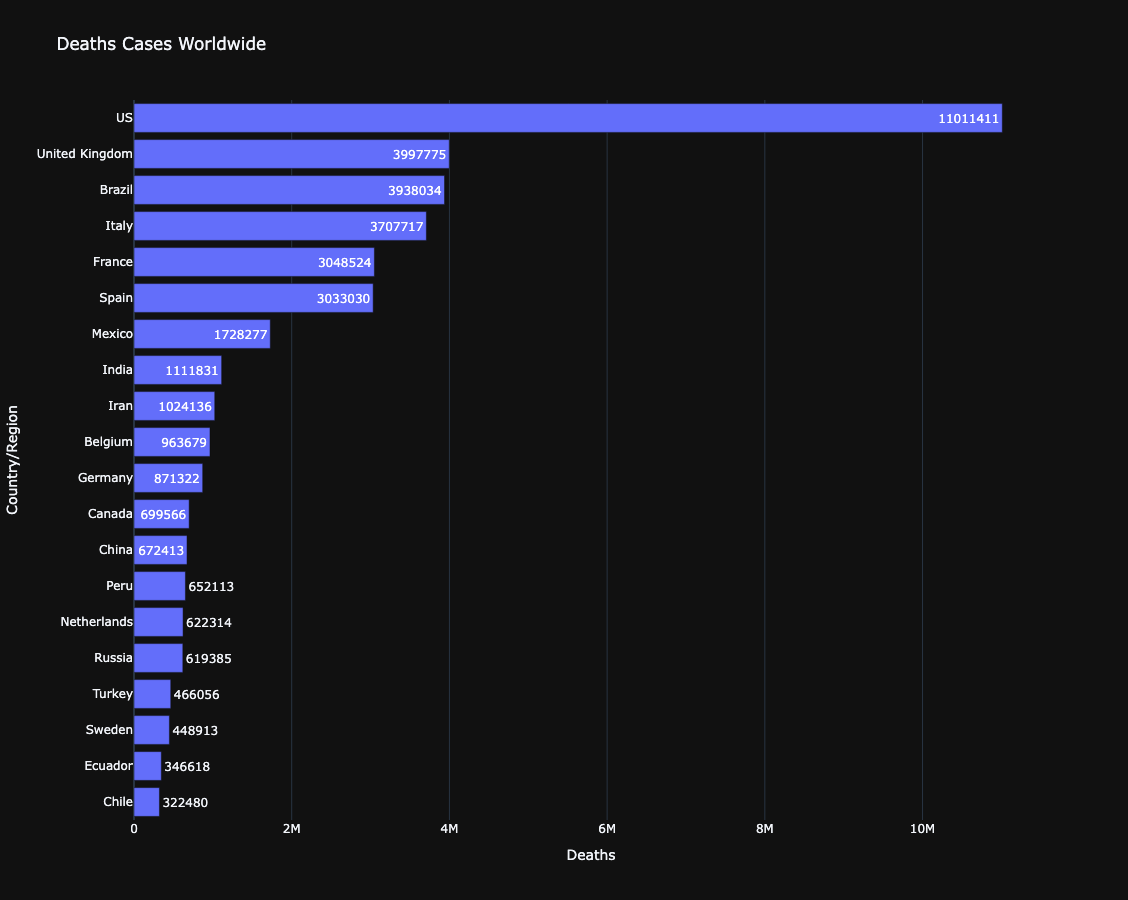

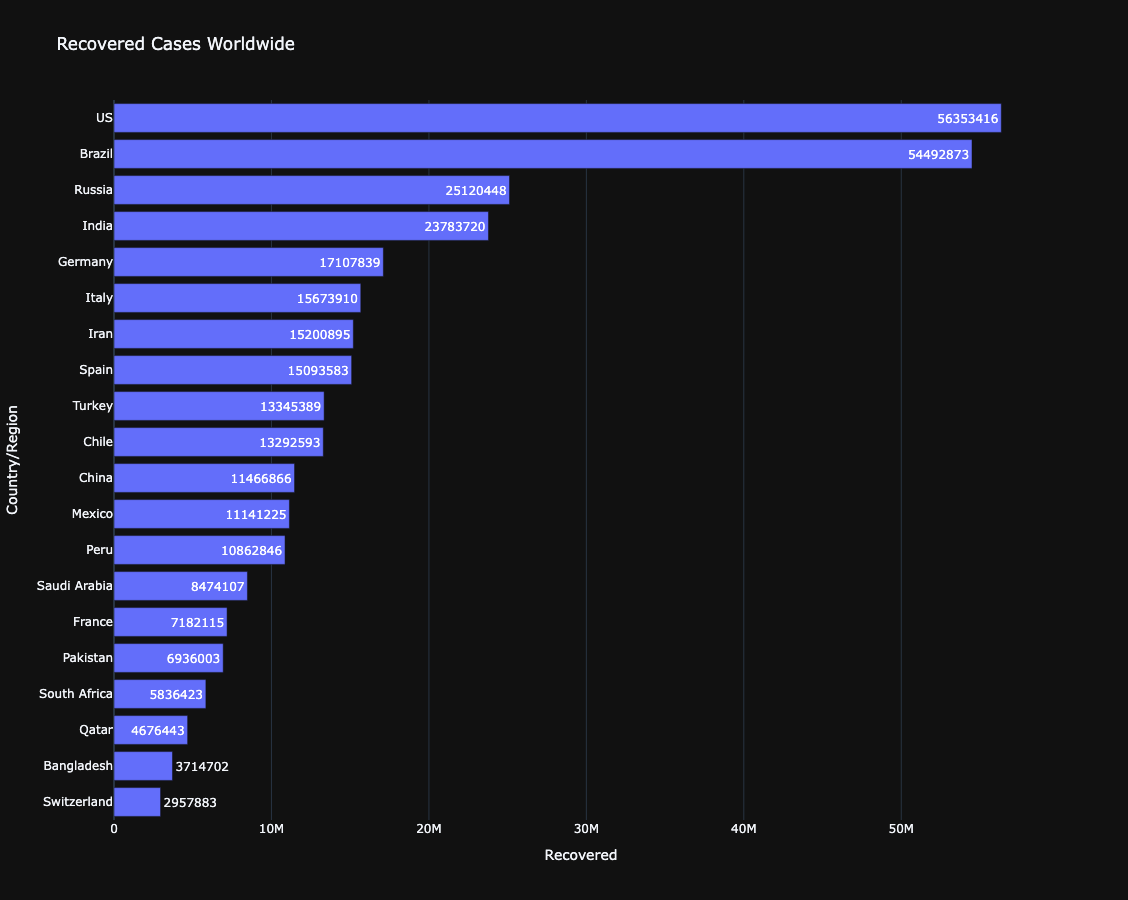

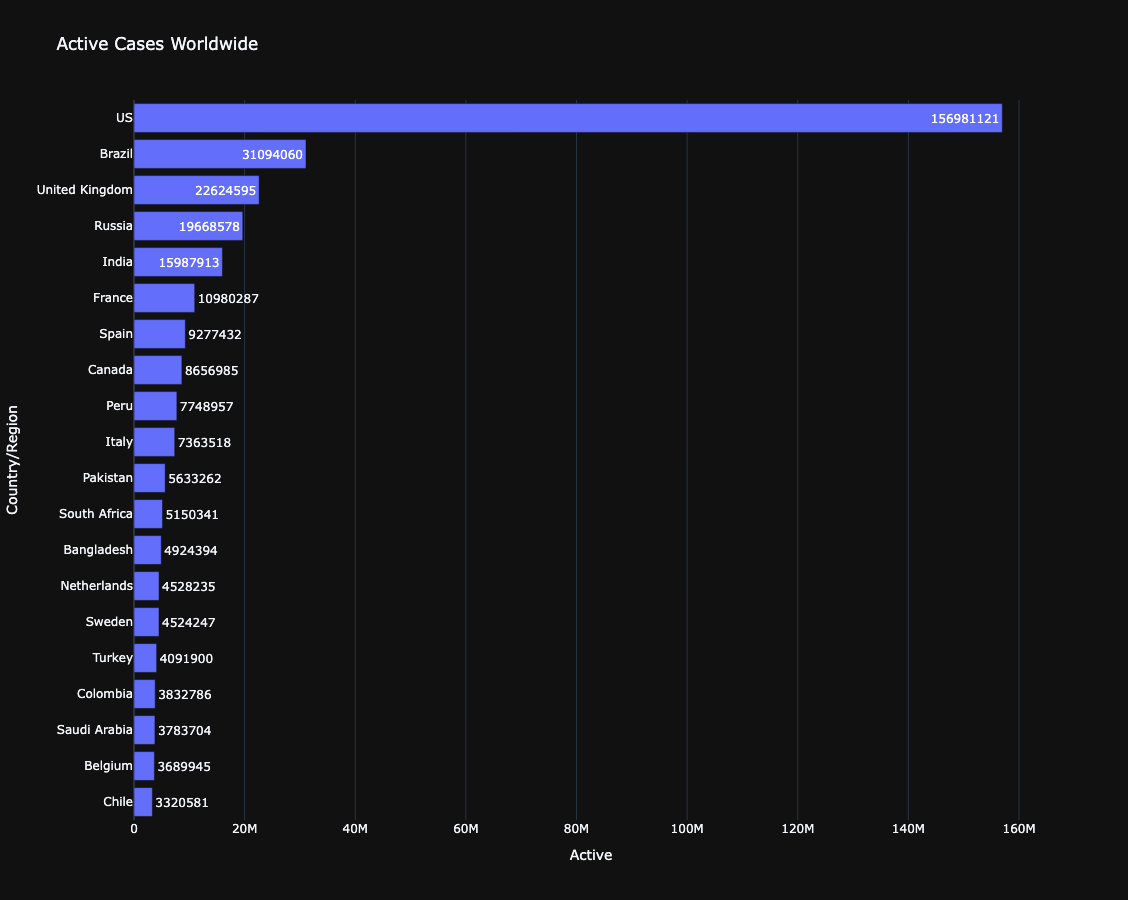

In [13]:
# Creating a dataframe with total no of cases for every country
confirmiedcases = pd.DataFrame(cleaned_data.groupby('Country/Region')['Confirmed'].sum())
confirmiedcases['Country/Region'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,188)

Deathcases = pd.DataFrame(cleaned_data.groupby('Country/Region')['Deaths'].sum())
Deathcases['Country/Region'] = Deathcases.index
Deathcases.iodex = np.arange(1,181)

Recoveredcases = pd.DataFrame(cleaned_data.groupby('Country/Region')['Recovered'].sum())
Recoveredcases['Country/Region'] = Recoveredcases.index
Recoveredcases.iodex = np.arange(1,188)

Activecases = pd.DataFrame(cleaned_data.groupby('Country/Region')['Active'].sum())
Activecases['Country/Region'] = Activecases.index
Activecases.iodex = np.arange(1,188)

global_Activecases = Activecases[['Country/Region','Active']]
global_Deathcases = Deathcases[['Country/Region','Deaths']]
global_Recoveredcases = Recoveredcases[['Country/Region','Recovered']]
global_confirmiedcases = confirmiedcases[['Country/Region','Confirmed']]

fig = px.bar(global_confirmiedcases.sort_values('Confirmed',ascending=False)[:20][::-1],x='Confirmed',y='Country/Region',title='Confirmed Cases Worldwide',text='Confirmed', height=900, orientation='h')
fig.show()

fig = px.bar(global_Deathcases.sort_values('Deaths',ascending=False)[:20][::-1],x='Deaths',y='Country/Region',title='Deaths Cases Worldwide',text='Deaths', height=900, orientation='h')
fig.show()

fig = px.bar(global_Recoveredcases.sort_values('Recovered',ascending=False)[:20][::-1],x='Recovered',y='Country/Region',title='Recovered Cases Worldwide',text='Recovered', height=900, orientation='h')
fig.show()

fig = px.bar(global_Activecases.sort_values('Active',ascending=False)[:20][::-1],x='Active',y='Country/Region',title='Active Cases Worldwide',text='Active', height=900, orientation='h')
fig.show()

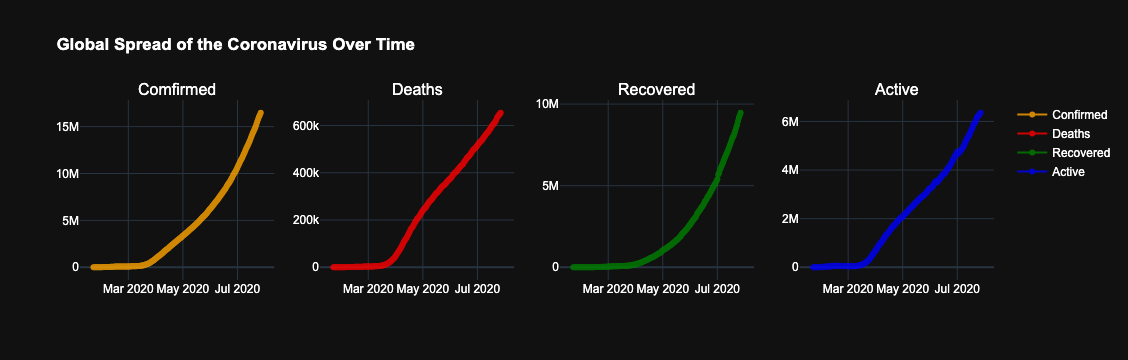

In [5]:
date_c = cleaned_data.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=4, subplot_titles=("Comfirmed", "Deaths", "Recovered",'Active'))

trace1 = go.Scatter(
                x=date_c['Date'],
                y=date_c['Confirmed'],
                name="Confirmed",
                line_color='orange',
                mode='lines+markers',
                opacity=0.8)
trace2 = go.Scatter(
                x=date_c['Date'],
                y=date_c['Deaths'],
                name="Deaths",
                line_color='red',
                mode='lines+markers',
                opacity=0.8)

trace3 = go.Scatter(
                x=date_c['Date'],
                y=date_c['Recovered'],
                name="Recovered",
                mode='lines+markers',
                line_color='green',
                opacity=0.8)

trace4 = go.Scatter(
                x=date_c['Date'],
                y=date_c['Active'],
                name="Active",
                line_color='blue',
                mode='lines+markers',
                opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.update_layout(template="plotly_dark",title_text = '<b>Global Spread of the Coronavirus Over Time </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [6]:
train_dataset = pd.read_csv('../data/covid19_novel/time_series_covid_19_confirmed.csv')
drop_clo = ['Province/State','Country/Region','Lat','Long']
train_dataset=train_dataset.drop(drop_clo,axis=1)
datewise= list(train_dataset.columns)
val_dataset = train_dataset[datewise[-30:]]

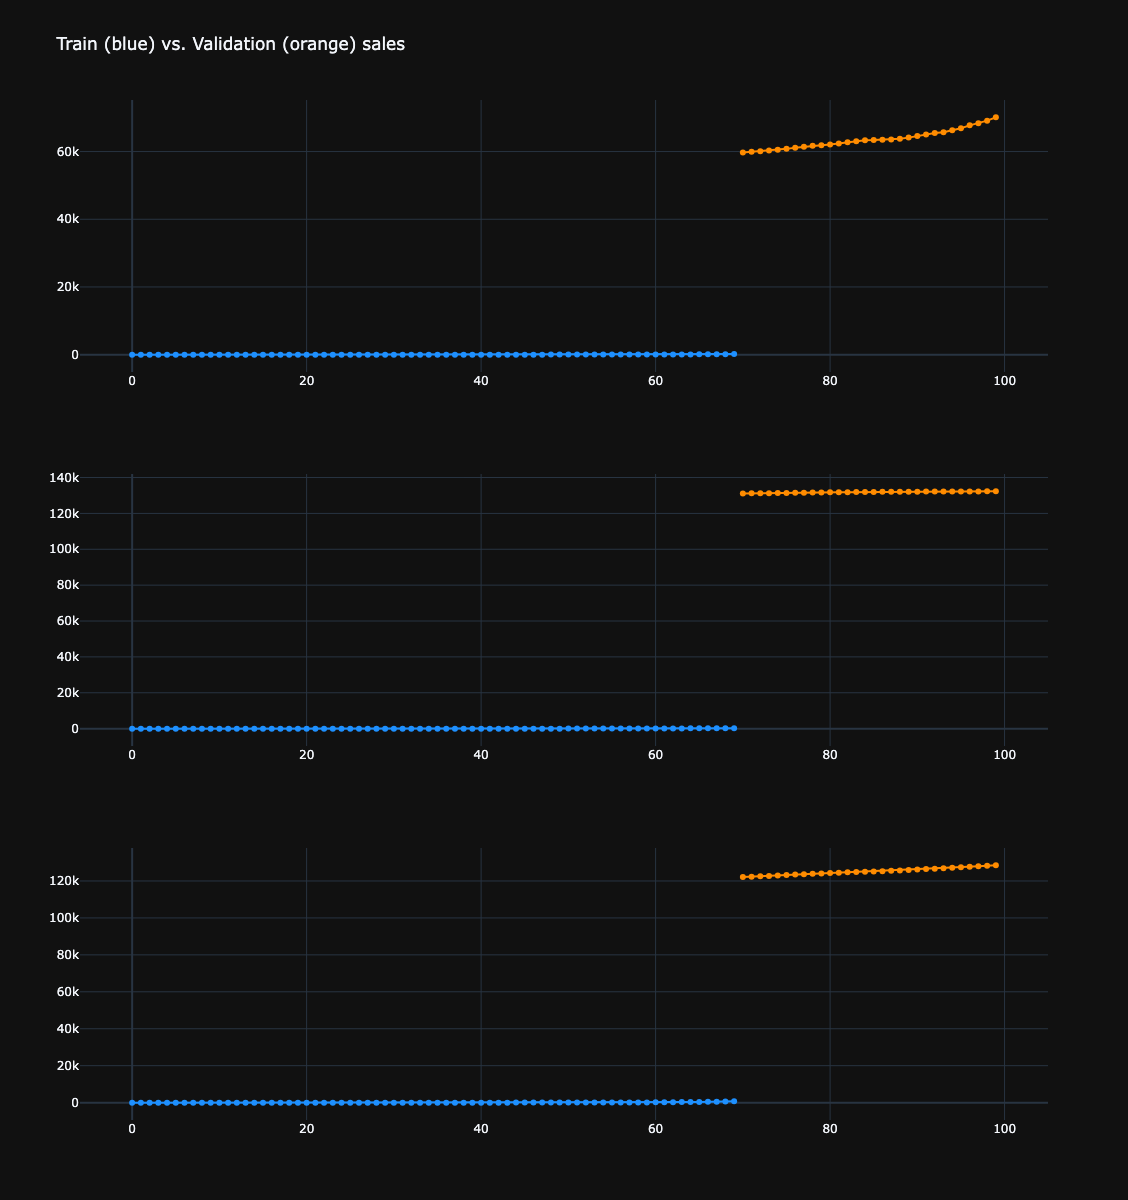

In [7]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines+markers', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"), showlegend=False,),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines+markers', marker=dict(color="darkorange"), showlegend=False,),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines+markers', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines+markers', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines+markers', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines+markers', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Train (blue) vs. Validation (orange) sales")
fig.show()

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from tqdm.std import tqdm

predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
    fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_arima = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

100%|██████████| 3/3 [00:00<00:00, 13.85it/s]


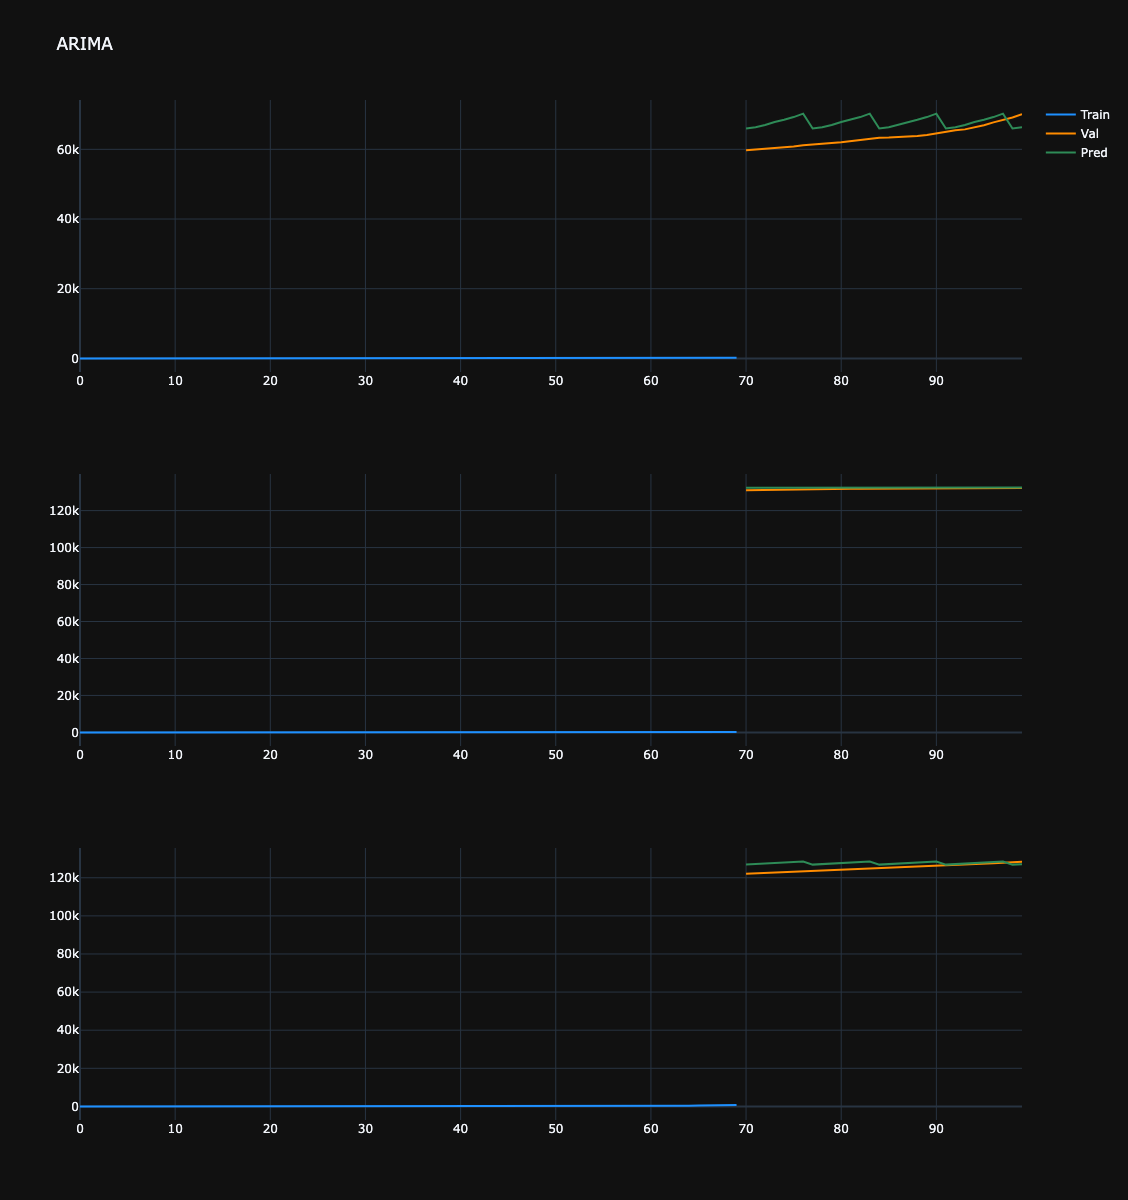

In [9]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="ARIMA")
fig.show()